<a href="https://colab.research.google.com/github/kojiyam/denso/blob/master/denso11_BoE_throughput.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
!pip install cairocffi python-igraph

In [18]:
import numpy as np
np.random.seed(seed=4)

import matplotlib.pyplot as plt
plt.rcParams["pdf.fonttype"] = 42
plt.rcParams["ps.fonttype"] = 42
plt.rcParams["font.size"] = 12

In [19]:
import igraph as ig

In [20]:
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

In [21]:
W = 800
Lambda = 2e-5
RADIUS = 200

In [22]:
N = np.random.poisson(lam=Lambda*W*W)
X = np.random.random(size=(N,2))*W

In [34]:
# 恣意的なもの．ここをコメントアウトすると，ランダムなもの
N = 9
X = np.array([[100,100], [250,100], [400,100], [550,100], [700,100], [80,350], 
              [220,350], [150,500], [150,650]])

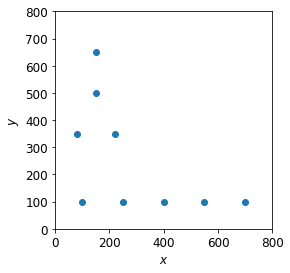

In [35]:
plt.axes().set_aspect('equal',adjustable='box')
plt.xlim(0, W)
plt.ylim(0, W)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.plot(X[:,0], X[:,1], "o")

In [36]:
D = squareform(pdist(X, 'euclidean'))

In [37]:
adjacency_matrix = (D<RADIUS)

In [38]:
for i in range(N):
  adjacency_matrix[i,i] = False

In [39]:
adjacency_graph = ig.Graph.Adjacency(adjacency_matrix, mode="undirected")

In [40]:
MISs = ig.Graph.largest_independent_vertex_sets(adjacency_graph)

In [41]:
print(MISs)
print(len(MISs))
1 in MISs[0]

[(0, 2, 4, 5, 8), (0, 2, 4, 6, 8)]
2


False

In [42]:
ni = np.zeros(N)
for i in range(N):
  N_MIS = 0
  for j in range(len(MISs)):
    N_MIS = N_MIS + int(i in MISs[j])
  ni[i] = N_MIS

`ni[i]/len(MISs)` がBoE throughput


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


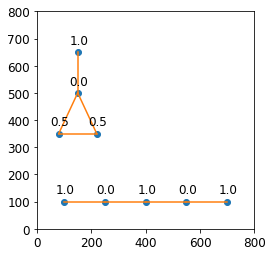

In [43]:
plt.axes().set_aspect('equal',adjustable='box')
plt.xlim(0, W)
plt.ylim(0, W)
#plt.xlabel("$x$")
#plt.ylabel("$y$")
plt.plot(X[:,0], X[:,1], "o")
for i in range(N):
  #plt.axes().annotate(i, (X[i,0]+30, X[i,1]-30))
  plt.axes().annotate(ni[i]/len(MISs), (X[i,0]-30, X[i,1]+30) )
  for j in range(i+1,N):
    if (adjacency_matrix[i,j]==True):
      plt.plot([X[i,0], X[j,0]], [X[i,1], X[j,1]], color="tab:orange")

メモ

https://stackoverflow.com/questions/29655111/igraph-graph-from-numpy-or-pandas-adjacency-matrix